In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import statistics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [74]:
usd_rates = pd.read_excel('usd_rates.xlsx')
usd_rates.head()

,nominal,data,curs,cdx
0,1,2017-01-10,59.8961,Доллар США
1,1,2017-01-11,59.9533,Доллар США
2,1,2017-01-12,60.1614,Доллар США
3,1,2017-01-13,59.4978,Доллар США
4,1,2017-01-14,59.3700,Доллар США


(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]), <a list of 10 Text xticklabel objects>)

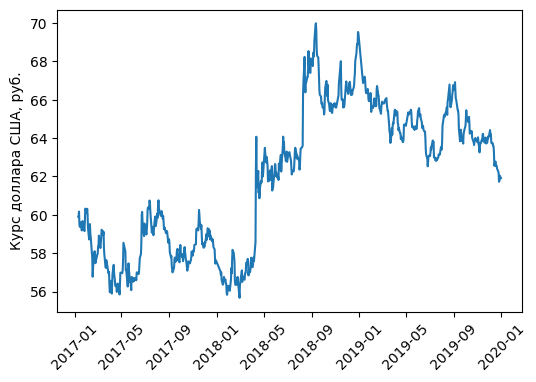

In [75]:
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(usd_rates.data, usd_rates.curs)
plt.ylabel("Курс доллара США, руб.")
plt.xticks(rotation=45)

In [76]:
# подготовка данных
trange = 7
tb = []
past_col = []
futr_col = []

for i in range(trange,len(usd_rates)-trange):
    t = (usd_rates.curs[(i-trange):(i+trange)])
    tb.append(list(t))

for i in range(trange):
    past_col.append(f'past_{i}')
    futr_col.append(f'futr_{i}')

data = pd.DataFrame(tb, columns = (past_col+futr_col))
data.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,futr_0,futr_1,futr_2,futr_3,futr_4,futr_5,futr_6
0,59.8961,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356
1,59.9533,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196
2,60.1614,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196,60.1618
3,59.4978,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196,60.1618,60.0851
4,59.3700,59.6067,59.4015,59.1830,59.3521,59.6697,59.5034,59.2168,59.1489,59.6356,60.3196,60.1618,60.0851,60.3099


In [77]:
data.shape

(726, 14)

In [78]:
# Обучающая выборка (тренировочная) 
X = data[past_col][:-10] 
Y = data[futr_col][:-10] 

# Тестовая (проверочная)
X_test = data[past_col][-10:]
Y_test = data[futr_col][-10:]

In [79]:
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=2000, random_state=42)
MLP.fit(X,Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=42, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Day #0, error = 0.6917434005094825


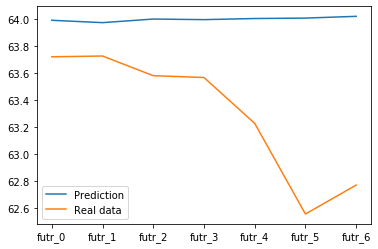

Day #1, error = 0.8915085267830827


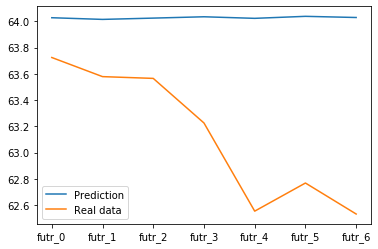

Day #2, error = 0.8758856593041457


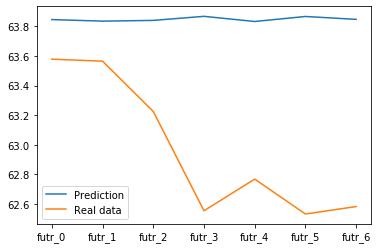

Day #3, error = 1.022996872089487


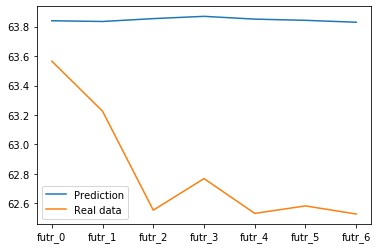

Day #4, error = 1.0574111209503292


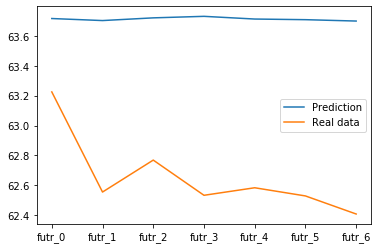

Day #5, error = 1.094093114741483


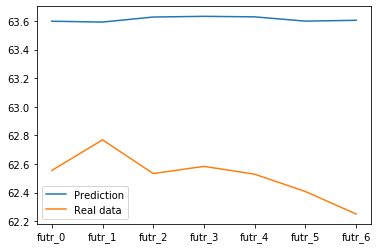

Day #6, error = 0.9571504351282515


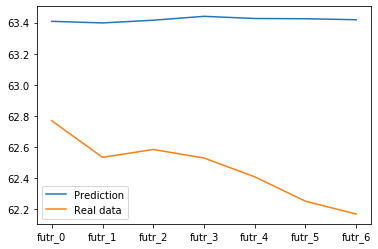

Day #7, error = 0.893065373736512


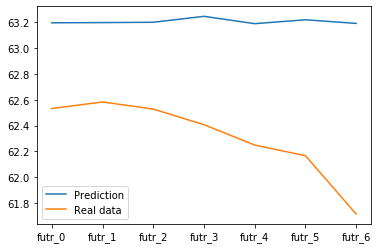

Day #8, error = 0.7436075869176447


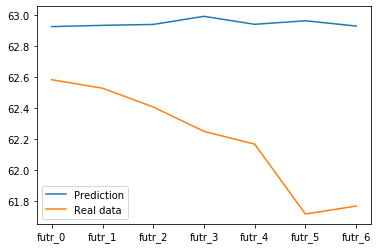

Day #9, error = 0.7608964405539537


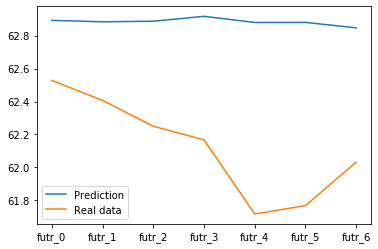

In [80]:
for i in range(10):
    prediction = MLP.predict([X_test.iloc[i]])
    err = mean_absolute_error(prediction[0], Y_test.iloc[i])
    print(f"Day #{i}, error = {err}")

    plt.plot(prediction[0], label="Prediction")
    plt.plot(Y_test.iloc[i], label="Real data")
    plt.legend()
    plt.show()

In [9]:
#Определим оптимальное количество примеров в тестовой и обучающей выборке для минимальной ошибки в MLP

In [81]:
k1 = []
pairs = []
for k in range(10,150):
    
    # Разбиваем на тестовую и обучающую выборки
   
    # Test set
    X = data[past_col][:-k]
    Y = data[futr_col][:-k]
    # Training set
    Xt = data[past_col][-k:]
    Yt = data[futr_col][-k:]

    # Обучаем модель
    MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=2000, random_state=42)
    MLP.fit(X,Y)

    # проверяем ошибку
    err = []
    days = []

    for i in range(k):
        prediction = MLP.predict([Xt.iloc[i]])
        e = mean_absolute_error(prediction[0], Yt.iloc[i])
        err.append(e)
    pairs.append([statistics.mean(err), k])
    #print(f'Средняя ошибка по всем значениям тестовой выборки: {statistics.mean(err)} c k: {k}')

In [82]:
min = pairs[0][0]
min_pair = 0
for pair in pairs:
    if pair[0] < min:
        min = pair[0]
        min_pair = pair

In [12]:
min_pair # При разбиении датасета на 680 + 46 записей (обуч.и тест. выборки) ошибка будет минимальна (в диапазоне k от 10 до 150)

[0.38992333821719055, 46]

In [83]:
k = 46

X = data[past_col][:-k]
Y = data[futr_col][:-k]

Xt = data[past_col][-k:]
Yt = data[futr_col][-k:]

In [14]:
RFR = RandomForestRegressor(random_state = 42)
params = {
        "max_depth": range(10,100,5),
    "max_features" : ["sqrt", "log2"],
    "n_estimators" : range(100,1000,100)
}


GS = GridSearchCV(RFR, params, 'neg_mean_absolute_error', cv=5, n_jobs=-1)
GS.fit(X,Y)
GS.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 800}

In [91]:
errors_rf = []

for i in range(7):
    prediction = GS.best_estimator_.predict([Xt.iloc[i]])
    err = mean_absolute_error(prediction[0], Yt.iloc[i])
    errors_rf.append(err)
    print(f"Day #{i}, error = {err}")
    

Day #0, error = 0.1137526087876911
Day #1, error = 0.14237019497808692
Day #2, error = 0.26869213857114005
Day #3, error = 0.4661586100437753
Day #4, error = 0.6818228626366333
Day #5, error = 0.7053623088874842
Day #6, error = 0.7483186129356858


In [16]:
KNR = KNeighborsRegressor()
params = {
    'n_neighbors' : range(2, 20, 2),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}


GSK = GridSearchCV(KNR, params, scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
GSK.fit(X,Y)
GSK.best_params_

{'metric': 'euclidean', 'n_neighbors': 18, 'weights': 'distance'}

In [92]:
errors_kn = []
for i in range(7):
    prediction = GSK.best_estimator_.predict([Xt.iloc[i]])
    err = mean_absolute_error(prediction[0], Yt.iloc[i])
    errors_kn.append(err)
    print(f"Day #{i}, error = {err}")
    

Day #0, error = 0.23968197836622096
Day #1, error = 0.3138947062491602
Day #2, error = 0.3213813133660953
Day #3, error = 0.49945263302859033
Day #4, error = 0.5644485462328868
Day #5, error = 0.48293978896049844
Day #6, error = 0.6122227402840709


dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [86]:
DTR = DecisionTreeRegressor()
params = {
    'max_depth' : np.arange(1, 21),
    'min_samples_leaf' : [1, 5, 10, 20, 50, 100],
}


GST = GridSearchCV(DTR, params, scoring='neg_mean_squared_error',cv=5, n_jobs=-1)
GST.fit(X,Y)
GST.best_params_

{'max_depth': 4, 'min_samples_leaf': 20}

In [93]:
errors_dt = []
for i in range(7):
    prediction = GST.best_estimator_.predict([Xt.iloc[i]])
    err = mean_absolute_error(prediction[0], Yt.iloc[i])
    errors_dt.append(err)
    print(f"Day #{i}, error = {err}")

Day #0, error = 0.33501805929919065
Day #1, error = 0.2797832884097084
Day #2, error = 0.283211859838281
Day #3, error = 0.2959719676549974
Day #4, error = 0.2798576819407117
Day #5, error = 0.25968625336928347
Day #6, error = 0.2319495956873376


In [94]:
Results = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'KNeighborsRegressor', 'DecisionTreeRegressor'],
     
    'Day1' : [errors_rf[0], errors_kn[0], errors_dt[0]],
    'Day2' : [errors_rf[1], errors_kn[1], errors_dt[1]],
    'Day3' : [errors_rf[2], errors_kn[2], errors_dt[2]] })

In [95]:
Results

,Model,Day1,Day2,Day3
0,RandomForestRegressor,0.113753,0.142370,0.268692
1,KNeighborsRegressor,0.239682,0.313895,0.321381
2,DecisionTreeRegressor,0.335018,0.279783,0.283212
